In [196]:
!pip install yfinance


In [626]:
import yfinance as yf
import pandas as pd
import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt

In [628]:
ensign_ticker = "ENSG"
#date range
start_date = "2019-11-01"
end_date ="2024-11-01"

In [630]:
#downloading data
df_ensign = yf.download(ensign_ticker, start = start_date, end= end_date)
display(df_ensign.head())

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ENSG,ENSG,ENSG,ENSG,ENSG,ENSG
Date,,,,,,
2019-11-01 00:00:00+00:00,42.468433,43.070000,44.279999,42.369999,42.669998,237100
2019-11-04 00:00:00+00:00,42.014862,42.610001,43.189999,42.180000,43.189999,322100
2019-11-05 00:00:00+00:00,41.857098,42.450001,43.480000,42.189999,42.910000,240200
2019-11-06 00:00:00+00:00,41.344360,41.930000,42.580002,41.889999,42.520000,178300
2019-11-07 00:00:00+00:00,41.137299,41.720001,42.869999,41.099998,42.290001,210900


In [632]:
#date format
def format_and_round_df(df_ensign):
    df_ensign.index = pd.to_datetime(df_ensign.index)
    df_ensign.index = df_ensign.index.strftime('%Y-%m-%d')
    df_ensign = df_ensign.round(3)
    return df



display(df_ensign)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ENSG,ENSG,ENSG,ENSG,ENSG,ENSG
Date,,,,,,
2019-11-01 00:00:00+00:00,42.468433,43.070000,44.279999,42.369999,42.669998,237100
2019-11-04 00:00:00+00:00,42.014862,42.610001,43.189999,42.180000,43.189999,322100
2019-11-05 00:00:00+00:00,41.857098,42.450001,43.480000,42.189999,42.910000,240200
2019-11-06 00:00:00+00:00,41.344360,41.930000,42.580002,41.889999,42.520000,178300
2019-11-07 00:00:00+00:00,41.137299,41.720001,42.869999,41.099998,42.290001,210900
...,...,...,...,...,...,...
2024-10-25 00:00:00+00:00,152.820007,152.820007,155.679993,150.000000,150.000000,500700
2024-10-28 00:00:00+00:00,151.869995,151.869995,156.070007,151.580002,154.080002,384500


In [634]:
df_ensign.index = pd.to_datetime(df_ensign.index)

#daily returns

df_ensign['daily_returns'] = df_ensign['Adj Close'].pct_change() *100
df_ensign['daily_returns'] = df_ensign['daily_returns'].bfill()

#monthly

monthly_df = df_ensign.resample('ME')['Adj Close'].last()
df_ensign['monthly_returns']= df_ensign['Adj Close'].pct_change()*100

#annual

year_end_df = df_ensign.resample('YE')['Adj Close'].last()
df_ensign['annual_returns']=year_end_df.pct_change() * 100



#nan values
df_ensign['daily_returns'] = df_ensign['daily_returns'].bfill()
df_ensign['monthly_returns'] = df_ensign['monthly_returns'].bfill()
df_ensign['annual_returns'] = df_ensign['annual_returns'].bfill()

#daily range
df_ensign['daily_range'] = df_ensign['High'] - df_ensign['Low']

df_ensign.head()


Price,Adj Close,Close,High,Low,Open,Volume,daily_returns,monthly_returns,annual_returns,daily_range
Ticker,ENSG,ENSG,ENSG,ENSG,ENSG,ENSG,,,,
Date,,,,,,,,,,
2019-11-01 00:00:00+00:00,42.468433,43.070000,44.279999,42.369999,42.669998,237100,-1.068020,-1.068020,61.427238,1.910000
2019-11-04 00:00:00+00:00,42.014862,42.610001,43.189999,42.180000,43.189999,322100,-1.068020,-1.068020,61.427238,1.009998
2019-11-05 00:00:00+00:00,41.857098,42.450001,43.480000,42.189999,42.910000,240200,-0.375497,-0.375497,61.427238,1.290001
2019-11-06 00:00:00+00:00,41.344360,41.930000,42.580002,41.889999,42.520000,178300,-1.224971,-1.224971,61.427238,0.690002
2019-11-07 00:00:00+00:00,41.137299,41.720001,42.869999,41.099998,42.290001,210900,-0.500822,-0.500822,61.427238,1.770000


In [636]:
df_ensign.describe()

Price,Adj Close,Close,High,Low,Open,Volume,daily_returns,monthly_returns,annual_returns,daily_range
Ticker,ENSG,ENSG,ENSG,ENSG,ENSG,ENSG,,,,
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,546.000000,1258.000000
mean,85.303221,85.694642,86.823998,84.482957,85.644380,2.864280e+05,0.134170,0.134170,40.198182,2.341041
std,27.289685,27.135188,27.209022,27.012716,27.109005,3.449076e+05,2.522260,2.522260,22.951028,1.185394
min,24.668566,24.990000,28.020000,24.059999,25.760000,4.070000e+04,-22.307882,-22.307882,15.430950,0.459999
25%,73.248722,73.702501,75.015001,72.515001,73.785000,1.857750e+05,-1.063571,-1.063571,15.430950,1.559998
50%,85.097912,85.579998,86.965000,84.305000,85.805000,2.395500e+05,0.113241,0.113241,61.427238,2.084999
75%,95.351961,95.655003,96.934999,94.537498,95.772499,3.202750e+05,1.187354,1.187354,61.427238,2.800003
max,156.910004,156.910004,158.220001,155.429993,158.100006,1.122320e+07,20.790394,20.790394,61.427238,12.190002


In [638]:
df_ensign.to_csv('ensign_stock_data.csv', index=True)

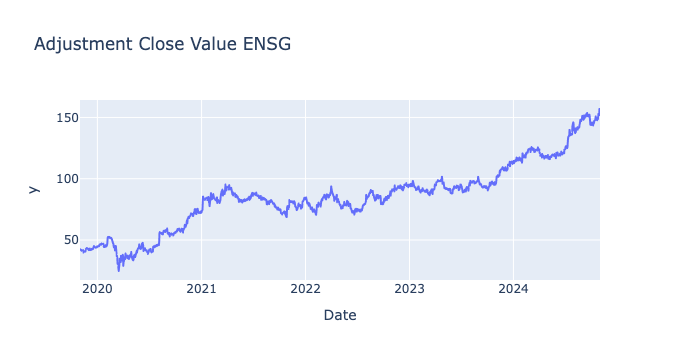

In [640]:
#data by day in period of 5y Adjusted
fig_adj = px.line(df_ensign, x=df_ensign.index, y=df_ensign['Adj Close'].values.squeeze(), title='Adjustment Close Value ENSG')
fig_adj.show()

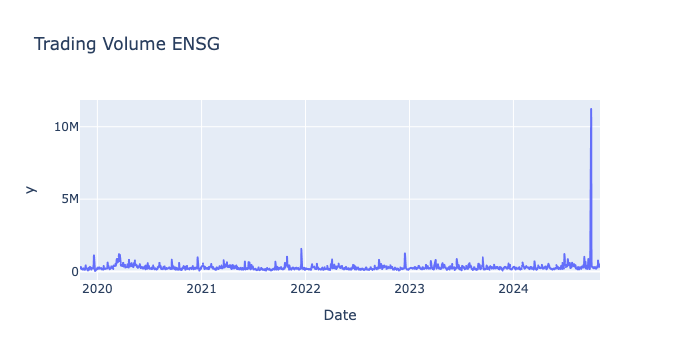

In [642]:
#Volume anlysis
fig_volume = px.line(df_ensign, x=df_ensign.index, y=df_ensign['Volume'].values.squeeze(), title='Trading Volume ENSG')
fig_volume.show()

In [644]:
# Summmary of data

summary_stats = df_ensign[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 
                      'daily_returns', 'monthly_returns', 'annual_returns', 'daily_range']].agg(['mean', 'std'])
summary_stats=summary_stats.round(3)

summary_stats.columns = [''.join(col).lower().replace('ensg', '') for col in summary_stats.columns]

display(summary_stats)

,open,high,low,close,adj close,volume,daily_returns,monthly_returns,annual_returns,daily_range
mean,85.644,86.824,84.483,85.695,85.303,286427.981,0.134,0.134,40.198,2.341
std,27.109,27.209,27.013,27.135,27.290,344907.611,2.522,2.522,22.951,1.185


In [646]:
df_ensign.describe()


Price,Adj Close,Close,High,Low,Open,Volume,daily_returns,monthly_returns,annual_returns,daily_range
Ticker,ENSG,ENSG,ENSG,ENSG,ENSG,ENSG,,,,
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,546.000000,1258.000000
mean,85.303221,85.694642,86.823998,84.482957,85.644380,2.864280e+05,0.134170,0.134170,40.198182,2.341041
std,27.289685,27.135188,27.209022,27.012716,27.109005,3.449076e+05,2.522260,2.522260,22.951028,1.185394
min,24.668566,24.990000,28.020000,24.059999,25.760000,4.070000e+04,-22.307882,-22.307882,15.430950,0.459999
25%,73.248722,73.702501,75.015001,72.515001,73.785000,1.857750e+05,-1.063571,-1.063571,15.430950,1.559998
50%,85.097912,85.579998,86.965000,84.305000,85.805000,2.395500e+05,0.113241,0.113241,61.427238,2.084999
75%,95.351961,95.655003,96.934999,94.537498,95.772499,3.202750e+05,1.187354,1.187354,61.427238,2.800003
max,156.910004,156.910004,158.220001,155.429993,158.100006,1.122320e+07,20.790394,20.790394,61.427238,12.190002


In [648]:
#csv file
summary_stats.to_csv('ENSG_anlysis.csv', index=False)

In [391]:
# data by the end of the month
monthly_df = df_ensign.resample("ME").last()

display(monthly_df)

Price,Adj Close,Close,High,Low,Open,Volume,daily_returns,monthly_returns,annual_returns,daily_range
Ticker,ENSG,ENSG,ENSG,ENSG,ENSG,ENSG,,,,
Date,,,,,,,,,,
2019-11-30,42.823,43.43,43.86,43.34,43.57,76200,-0.822178,-0.822178,61.427678,0.52
2019-12-31,44.786,45.37,45.46,44.23,44.48,232000,1.932312,1.932312,61.427678,1.23
2020-01-31,44.619,45.20,46.64,45.03,46.17,203500,-2.438011,-2.438011,61.427678,1.61
2020-02-29,43.928,44.50,45.75,43.64,44.40,374400,-3.112111,-3.112111,61.427678,2.11
2020-03-31,37.181,37.61,39.77,36.71,37.88,587000,-1.979859,-1.979859,61.427678,3.06
2020-04-30,36.983,37.41,39.97,37.33,39.79,580200,-8.196599,-8.196599,61.427678,2.64
2020-05-31,43.221,43.72,44.77,43.45,44.33,511000,-2.499492,-2.499492,61.427678,1.32
2020-06-30,41.426,41.85,41.97,40.17,40.28,379400,3.384078,3.384078,61.427678,1.80


In [385]:
##The opening price on November 30, 2019, was approximately $42.82, and by October 31, 2024, it has increased to about $154.99.
#The highest price reached was approximately $157.93 in October 2024.
#The lowest price during this period was about $36.98 in April 2020, reflecting a significant drop in the early days of the COVID-19 pandemic
#There are noticeable price swings, particularly between 2020 and 2021, where the stock rose from around $37.18 in March 2020 to a peak of $93.09 by March 2021.
#The stock showed volatility, particularly in early 2020 and in the months following, likely influenced by economic conditions and events such as the pandemic.

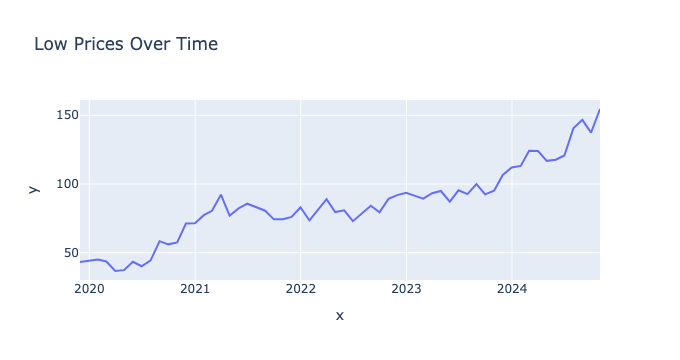

In [393]:
#monthly
ensign_low_data = monthly_df[('Low', 'ENSG')]
fig_low_ensign = px.line(x=monthly_df.index, y=ensign_low_data, title='Low Prices Over Time')
fig_low_ensign.show()

In [395]:

monthly_df.describe()

Price,Adj Close,Close,High,Low,Open,Volume,daily_returns,monthly_returns,annual_returns,daily_range
Ticker,ENSG,ENSG,ENSG,ENSG,ENSG,ENSG,,,,
count,60.000000,60.000000,60.000000,60.000000,60.000000,6.000000e+01,60.000000,60.000000,26.000000,60.00000
mean,86.030317,86.408833,87.651500,84.989000,86.338667,5.357017e+05,-0.176955,-0.176955,40.198985,2.66250
std,27.908663,27.747706,27.899797,27.346088,27.817743,1.413988e+06,2.049772,2.049772,23.383705,1.75414
min,36.983000,37.410000,39.770000,36.710000,37.880000,7.620000e+04,-8.196599,-8.196599,15.432176,0.52000
25%,74.074250,74.535000,75.517500,73.365000,74.262500,2.460750e+05,-1.359813,-1.359813,15.432176,1.75500
50%,84.672000,85.185000,86.325000,83.100000,84.315000,3.131000e+05,-0.185166,-0.185166,61.427678,2.19500
75%,96.506250,96.667500,96.895000,94.970000,95.610000,4.500500e+05,1.299387,1.299387,61.427678,3.14500
max,154.990000,154.990000,157.930000,154.580000,155.300000,1.122320e+07,4.104381,4.104381,61.427678,11.81000


In [397]:

df_ensign.index

DatetimeIndex(['2019-11-01', '2019-11-04', '2019-11-05', '2019-11-06',
               '2019-11-07', '2019-11-08', '2019-11-11', '2019-11-12',
               '2019-11-13', '2019-11-14',
               ...
               '2024-10-18', '2024-10-21', '2024-10-22', '2024-10-23',
               '2024-10-24', '2024-10-25', '2024-10-28', '2024-10-29',
               '2024-10-30', '2024-10-31'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

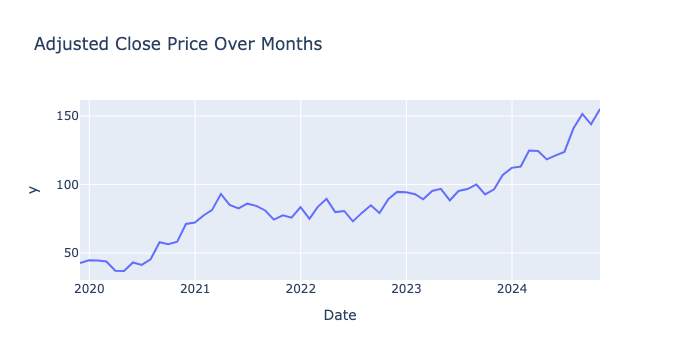

In [401]:
#monthly Adjucted price
fig_monthly = px.line(monthly_df, x=monthly_df.index, y=monthly_df['Adj Close'].values.squeeze(), title='Adjusted Close Price Over Months')
fig_monthly.show()

In [403]:
#monthly_df.columns

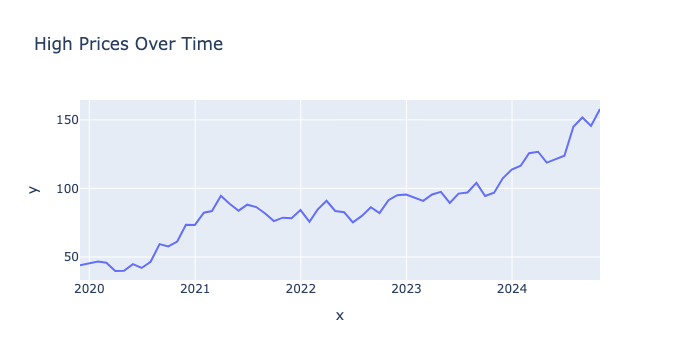

In [405]:
#high low monthly prices
high_data = monthly_df[('High', 'ENSG')]
fig_high = px.line(x=monthly_df.index, y=high_data, title='High Prices Over Time')
fig_high.show()

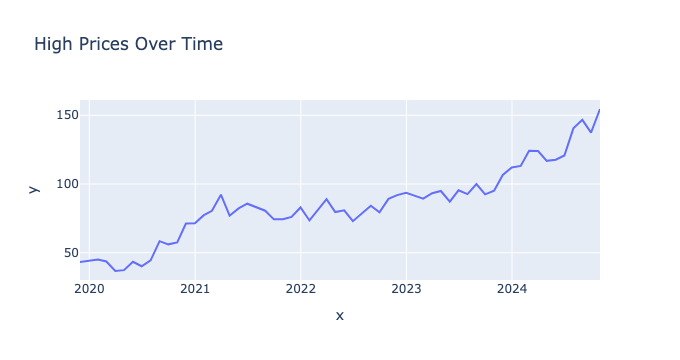

In [407]:
low_data = monthly_df[('Low', 'ENSG')]
fig_low = px.line(x=monthly_df.index, y=low_data, title='High Prices Over Time')
fig_low.show()

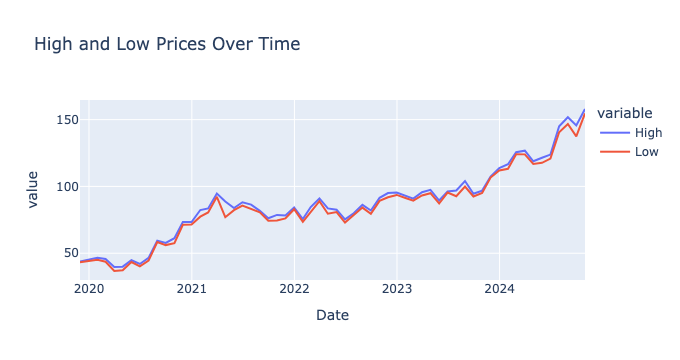

In [409]:
#Merged High and low monthly df
merged_df = pd.DataFrame({'Date':monthly_df.index,
                         'High': high_data,
                         'Low': low_data})

fig = px.line(merged_df, x='Date', y=['High', 'Low'], title='High and Low Prices Over Time')
fig.show()

In [411]:
#Year end data, average(mean)
year_end_df = df_ensign.resample("YE").mean()
display(year_end_df)

Price,Adj Close,Close,High,Low,Open,Volume,daily_returns,monthly_returns,annual_returns,daily_range
Ticker,ENSG,ENSG,ENSG,ENSG,ENSG,ENSG,,,,
Date,,,,,,,,,,
2019-12-31,42.436415,43.035122,43.579756,42.458780,42.985610,233846.341463,0.117711,0.117711,61.427678,1.120976
2020-12-31,49.920909,50.457826,51.514387,49.397431,50.419051,314638.339921,0.290754,0.290754,61.427678,2.116957
2021-12-31,82.435992,83.069722,84.370000,81.707222,83.035476,255346.825397,0.077892,0.077892,15.432176,2.662778
2022-12-31,83.185028,83.600438,84.804622,82.314900,83.574502,238649.800797,0.067539,0.067539,NaN,2.489721
2023-12-31,95.743464,95.972720,96.921440,94.919560,95.929400,274635.600000,0.078468,0.078468,NaN,2.001880
2024-12-31,129.632223,129.683081,130.934218,128.246682,129.562607,370747.867299,0.162088,0.162088,NaN,2.687536


In [413]:

print(type(year_end_df))

<class 'pandas.core.frame.DataFrame'>


In [415]:
year_end_df.describe()

Price,Adj Close,Close,High,Low,Open,Volume,daily_returns,monthly_returns,annual_returns,daily_range
Ticker,ENSG,ENSG,ENSG,ENSG,ENSG,ENSG,,,,
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,3.000000,6.000000
mean,80.559005,80.969818,82.020737,79.840763,80.917774,281310.795813,0.132409,0.132409,46.095844,2.179974
std,31.752771,31.557635,31.736966,31.318740,31.534846,52728.049222,0.085159,0.085159,26.555516,0.590564
min,42.436415,43.035122,43.579756,42.458780,42.985610,233846.341463,0.067539,0.067539,15.432176,1.120976
25%,58.049680,58.610800,59.728291,57.474879,58.573158,242824.056947,0.078036,0.078036,38.429927,2.030649
50%,82.810510,83.335080,84.587311,82.011061,83.304989,264991.212698,0.098089,0.098089,61.427678,2.303339
75%,92.603855,92.879650,93.892235,91.768395,92.840675,304637.654941,0.150994,0.150994,61.427678,2.619514
max,129.632223,129.683081,130.934218,128.246682,129.562607,370747.867299,0.290754,0.290754,61.427678,2.687536


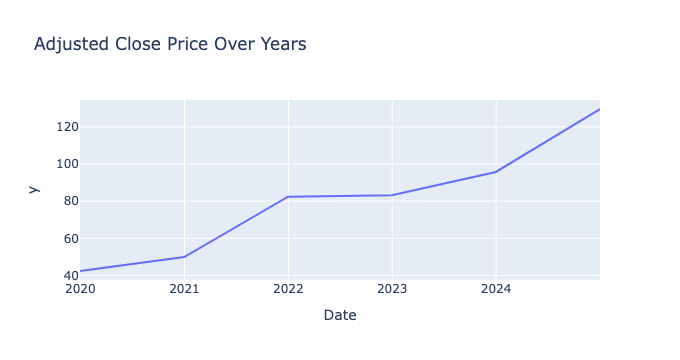

In [417]:
###Visulaisation yearly
fig_year = px.line(year_end_df, x=year_end_df.index, y=year_end_df['Adj Close'].values.squeeze(), title='Adjusted Close Price Over Years')
fig_year.show()